# 量子全加算器（Quantum Full Adder）の解説

## 基本計算式
|A⟩|B⟩|Cin⟩|0⟩ → |A⟩|B⟩{(|A⟩⊕|B⟩)⊕|Cin⟩}{|A⟩|B⟩+(|A⟩⊕|B⟩)|Cin⟩} = |A⟩|B⟩|S⟩|Cout⟩

## 式の解釈
量子全加算器は、入力状態（|A⟩|B⟩|Cin⟩|0⟩）から出力状態（|A⟩|B⟩|S⟩|Cout⟩）への変換を表現します。

## 計算の分解

### 1. Sum（S）の計算部分
｛(|A⟩⊕|B⟩)⊕|Cin⟩｝
- 古典論理回路でのSumと同等
- A⊕B⊕Cin で計算

### 2. Carry out（Cout）の計算部分
｛|A⟩|B⟩+(|A⟩⊕|B⟩)|Cin⟩｝
- 古典論理回路でのCarry outと同等
- AB + (A⊕B)Cin で計算

## 内積表現の意味

### 1. 量子力学的な解釈
- 状態を基底状態での展開として表現
- |S⟩と|Cout⟩を出力の基底状態として使用
- 入出力状態を重ね合わせで表現

### 2. 実用的なメリット

#### 入力側の利点
- |A⟩、|B⟩、|Cin⟩の重ね合わせによる並列計算
- 8通りの入力パターンを同時に処理可能

#### 出力側の利点
- 入力情報|A⟩|B⟩を保持しながら計算結果|S⟩|Cout⟩を取得
- 4量子ビット系全体での重ね合わせ状態を実現
- 入出力間の相関関係の解析が可能

#### システム全体の利点
- 量子状態の測定結果の確率的予測
- 量子もつれを利用した発展的な応用
- 回路の数学的検証と古典回路との対応

この仕組みにより、古典的な全加算器の機能を保ちながら、量子コンピュータの利点である並列性を活用できる回路となっています。

In [46]:
# Import the qiskit library
#量子ビット
from qiskit import QuantumCircuit

#シミュレータ
from qiskit_aer import StatevectorSimulator

#ブロッホ球表示
from qiskit.visualization import plot_bloch_multivector

#シミュレータとパスマネージャとサンプラとグラフ化
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

#表示をクリア
from IPython.display import clear_output

## 量子ビット、古典ビットの用意  
- q₀ : |A〉  
- q₁ : |B〉  
- q₂ : |Cin〉
- q₃,q₄,q₅ : Ancilla Bit  
- q₆,q₇: Work Bit ⇒ |Cout〉,|S〉
- c₀,c₁ : 古典ビット  
![quantum-circuit-fulladder](quantum-circuit-fulladder-1.png)  
**条件：|Cout〉と|S〉を並べて表示**  
『Pythonではじめる量子AI入門 量子機械学習から量子回路自動設計まで (エンジニア入門シリーズ)』1.4.1項問題から  
https://amzn.asia/d/aeMSoG8

In [47]:
#量子ビット8つ（|A〉|B〉 |Cin〉各1、Anciila Bit|0〉3つ、Work Bit|0〉2つ）と古典ビット2つ用意
qc = QuantumCircuit(8,2) #8量子ビット、2古典ビットを準備

## 入力ビットを準備
- 入力はq₀=A〉,q₁=|B〉,q₂=|Cout〉  
- 出力はq₇→c₀（Sum）, q₆→c₁（Cout）として結果の表記：(c₀,c₁)=|Sum,Cout⟩
1. q₀,q₁,q₂をすべて反転して|１〉に設定 : |1⟩|1⟩|1⟩ → |11⟩
2. q₀,q₁を反転 : |1⟩|1⟩|0⟩ → |10⟩
3. q₁,q₂を反転 : |0⟩|1⟩|1⟩ → |10⟩
4. q₀,q₂を反転 : |1⟩|0⟩|1⟩ → |10⟩
5. q₀のみ反転 : |1⟩|0⟩|0⟩ → |01⟩
6. q₁のみ反転 : |0⟩|1⟩|0⟩ → |01⟩
7. q₂のみ反転 : |0⟩|0⟩|1⟩ → |01⟩
8. どのビットも基底状態のまま : |0⟩|0⟩|0⟩ → |00⟩

In [48]:
#1. q₀,q₁,q₂をすべて反転
qc.x(0)
qc.x(1)
qc.x(2)

#2. q₀,q₁を反転
"""
qc.x(0)
qc.x(1)
"""

#3. q₁,q₂を反転
"""
qc.x(1)
qc.x(2)
"""

#4. q₀,q₂を反転
"""
qc.x(0)
qc.x(2)
"""

#5. q₀のみ反転
"""
qc.x(0)
"""

#6. q₁のみ反転
"""
qc.x(1)
"""

#7. q₂のみ反転
"""
qc.x(2)
"""

#8. どのビットも基底状態のまま
"""
操作をしない
"""

'\n操作をしない\n'

## 半加算器1を構成
q₀とq₃、q₁とq₃のCNOT（ここまででXOR）、q₀とq₁とq₄でCCNOTを作成（これでHA1）

In [49]:
#q₀でq3、q₁でq3、q₀とq₁でq₄の順番で制御
qc.cx(0,3)
qc.cx(1,3)
qc.ccx(0,1,4)

## 半加算器2を構成
q₂とq₇、q₃とq₇のCNOT（ここまででXOR）、q₂とq₃とq₅でCCNOTを作成（これでHA2）

In [50]:
#q₂でq₇、q₃でq₇、q₂とq₃でq₅の順番で制御
qc.cx(2,7)
qc.cx(3,7)
qc.ccx(2,3,5)

## OR回路を構成
q₄とq₆、q₅とq₆、q₄とq₅とq₆でORを作成

In [51]:
#q₄とq₆、q₅とq₆、q₄とq₅とq₆の順番で制御
qc.cx(4,6)
qc.cx(5,6)
qc.ccx(4,5,6)

## アンシラビットをアンコンピュート
q₃、q₄、q₅はアンコンピュート

In [52]:
#アンコンピュート
qc.ccx(2,3,5)  # C2midのアンコンピュート
qc.ccx(0,1,4)  # C1midのアンコンピュート
qc.cx(1,3)     # C1midのアンコンピュート（その2）
qc.cx(0,3)     # C1midのアンコンピュート（その1）

## 結果を測定
q₆とq₇を測定してそれぞれc₁とc₀に記録

In [53]:
#測定
qc.measure(6,1)  # Cout の測定をクラシカルビット1へ
qc.measure(7,0)  # Sum の測定をクラシカルビット0へ

## 回路図を表示

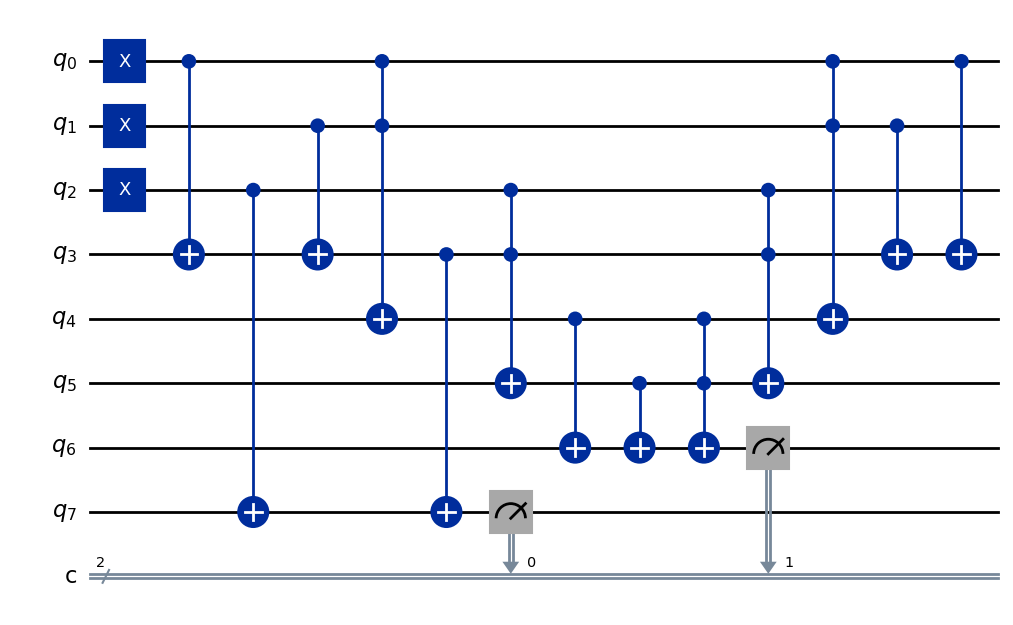

In [54]:
#表示をクリア
clear_output(wait=True)

#回路図を表示
qc.draw(output="mpl")

**測定結果を表示**  
- |0⟩|0⟩ → |00⟩ （0 + 0 = 0）
- |0⟩|1⟩ → |01⟩ （0 + 1 = 1）
- |1⟩|0⟩ → |01⟩ （1 + 0 = 1）
- |1⟩|1⟩ → |10⟩ （1 + 1 = 2）

 > Counts: {'11': 1024}


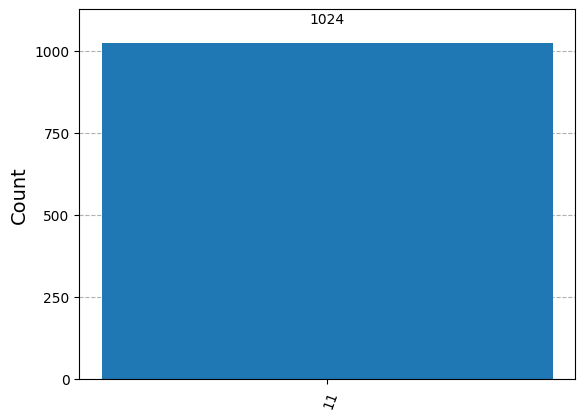

In [55]:
#シミュレータを準備
backend = AerSimulator()

#パスマネージャを準備
passmanager = generate_preset_pass_manager(backend=backend, optimization_level=1)

#回路を最適化
isa_circuit = passmanager.run(qc)

#シミュレータからサンプラを作って実行
sampler = Sampler(backend)
job  = sampler.run([isa_circuit])
result = job.result()

#測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

#ヒストグラムで表示
plot_histogram( counts )

**実機で実行**
- 認証情報はディスクに保存済み。
- [text](qt_hundson_intro.ipynb)のデッドコピー

最も空いているバックエンドは:  <IBMBackend('ibm_brisbane')>
job id: cxn6ach3ej4g008gqjm0
 > Counts: {'10': 856, '01': 1135, '00': 1306, '11': 799}


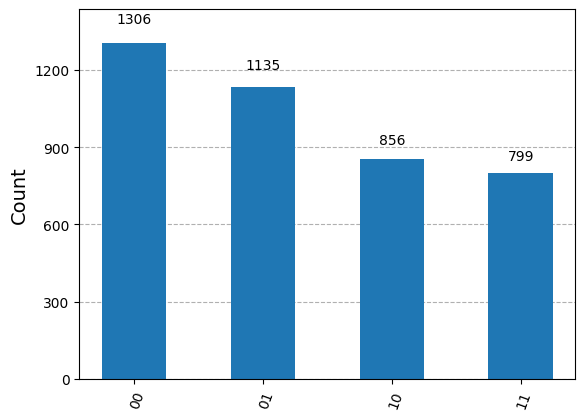

In [56]:
#実機実行時はserviceインスタンス作成が必要
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
service.backends()

#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
print("最も空いているバックエンドは: ", backend)

# 回路を実機で実行可能なbasisゲートにトランスパイルします
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

# Samplerで実行します
sampler = Sampler(backend)
job = sampler.run([isa_circuit])

print("job id:", job.job_id()) # job idの確認

# ジョブの実行状態を確認します
job.status()

### job has successfully runになってから実行します ###
result = job.result()
print(f" > Counts: {result[0].data.c.get_counts()}")

from qiskit.visualization import plot_histogram
plot_histogram(result[0].data.c.get_counts())

## 考えられる要因

1. 量子ゲートの不完全性：
実機では完璧な量子操作は難しく、各ゲートには誤差が含まれます  

2. デコヒーレンス：
量子状態が環境との相互作用で古典的な状態に崩壊する現象  

3. 読み出しエラー：
量子状態の測定時に発生するエラー  

このようなノイズや誤差は現在の量子コンピュータでは避けられない課題で、特に量子ビット数やゲート数が増えると、その影響はより顕著になります。  
これが実用的な量子コンピュータの実現における主要な技術的課題の一つとなっています。